In [141]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Leitura do arquivo

caminho_arquivo = 'tratados_10x10det/iron/iron1E17_array'

df = pl.read_csv(caminho_arquivo, has_header= False).filter(pl.col('column_1').str.contains('TRIG'))

df = df.with_columns(pl.col("column_1").str.split(" ").alias("split_column"))
df = df.with_columns(pl.col("split_column").list.get(0).alias("TRIG"))
df = df.with_columns(pl.col("split_column").list.get(1).cast(pl.Int64).alias("positrons"))
df = df.with_columns(pl.col("split_column").list.get(2).cast(pl.Int64).alias("electrons"))
df = df.with_columns(pl.col("split_column").list.get(3).cast(pl.Int64).alias("muons_plus"))
df = df.with_columns(pl.col("split_column").list.get(4).cast(pl.Int64).alias("muons_minus"))
df = df.with_columns(pl.col("split_column").list.get(5).cast(pl.Float64).alias("time"))
df = df.with_columns(
    (pl.col("positrons") + pl.col("electrons") + pl.col("muons_plus") + pl.col("muons_minus")).alias("total_particles")
)

df

column_1,split_column,TRIG,positrons,electrons,muons_plus,muons_minus,time,total_particles
str,list[str],str,i64,i64,i64,i64,f64,i64
"""TRIG1 0 0 0 0 0.00000e+00""","[""TRIG1"", ""0"", … ""0.00000e+00""]","""TRIG1""",0,0,0,0,0.0,0
"""TRIG2 0 0 0 0 0.00000e+00""","[""TRIG2"", ""0"", … ""0.00000e+00""]","""TRIG2""",0,0,0,0,0.0,0
"""TRIG3 0 0 0 0 0.00000e+00""","[""TRIG3"", ""0"", … ""0.00000e+00""]","""TRIG3""",0,0,0,0,0.0,0
"""TRIG4 0 0 0 0 0.00000e+00""","[""TRIG4"", ""0"", … ""0.00000e+00""]","""TRIG4""",0,0,0,0,0.0,0
"""TRIG5 0 0 0 0 0.00000e+00""","[""TRIG5"", ""0"", … ""0.00000e+00""]","""TRIG5""",0,0,0,0,0.0,0
…,…,…,…,…,…,…,…,…
"""TRIG96 0 0 0 0 0.00000e+00""","[""TRIG96"", ""0"", … ""0.00000e+00""]","""TRIG96""",0,0,0,0,0.0,0
"""TRIG97 0 0 0 0 0.00000e+00""","[""TRIG97"", ""0"", … ""0.00000e+00""]","""TRIG97""",0,0,0,0,0.0,0
"""TRIG98 0 0 0 0 0.00000e+00""","[""TRIG98"", ""0"", … ""0.00000e+00""]","""TRIG98""",0,0,0,0,0.0,0


In [143]:
angles = pl.read_csv(caminho_arquivo, has_header= False).filter(pl.col('column_1').str.contains('EVTH'))
angles = angles.with_columns(pl.col("column_1").str.split(" ").alias("split_column"))
angles = angles.with_columns(pl.col("split_column").list.get(5).cast(pl.Float64).alias("theta"))
angles = angles.with_columns(pl.col("split_column").list.get(6).cast(pl.Float64).alias("phi"))
angles

column_1,split_column,theta,phi
str,list[str],f64,f64
"""EVTH 1 5626 1.000e+08 37.022 4…","[""EVTH"", ""1"", … ""175.381""]",45.309,175.381
"""EVTH 2 5626 1.000e+08 67.666 4…","[""EVTH"", ""2"", … ""47.567""]",44.93,47.567
"""EVTH 3 5626 1.000e+08 43.067 2…","[""EVTH"", ""3"", … ""44.659""]",28.697,44.659
"""EVTH 4 5626 1.000e+08 45.138 4…","[""EVTH"", ""4"", … ""107.638""]",49.273,107.638
"""EVTH 5 5626 1.000e+08 37.797 5…","[""EVTH"", ""5"", … ""-127.833""]",56.536,-127.833
…,…,…,…
"""EVTH 996 5626 1.000e+08 30.145…","[""EVTH"", ""996"", … ""104.991""]",31.881,104.991
"""EVTH 997 5626 1.000e+08 30.090…","[""EVTH"", ""997"", … ""-172.987""]",24.587,-172.987
"""EVTH 998 5626 1.000e+08 44.119…","[""EVTH"", ""998"", … ""165.980""]",29.56,165.98


In [144]:
import re
def formatar_string(s):

    nome_arquivo = s.split('/')[-1]
   
    match = re.match(r'([a-zA-Z]+)([0-9]+(?:\.[0-9]+)?[Ee][0-9]+)', nome_arquivo)

    if match:
        
        palavra = match.group(1).capitalize()
        numero = match.group(2)

        return f'{palavra} {numero}'
    else:
        return nome_arquivo

name = formatar_string(caminho_arquivo)
name

'Iron 1E17'

In [145]:
# Posição dos tanques

numDetectors = 100
gridSize = 10
spacing = 10
area = 1.0

x_det = np.zeros(numDetectors)
y_det = np.zeros(numDetectors)
areas = np.full(numDetectors, area)

index = 0
halfGridSize = gridSize // 2

for i in range(gridSize):
    for j in range(gridSize):
        x_det[index] = (j - halfGridSize + 0.5) * spacing
        y_det[index] = (i - halfGridSize + 0.5) * spacing
        areas[index] = area
        index += 1

#print("x_det:", x_det)
#print("y_det:", y_det)
#print("areas:", areas)

In [146]:
from scipy.spatial import KDTree

df2 = df.group_by('TRIG').agg(pl.col('total_particles', 'time')).sort(
    pl.col('TRIG').str.extract(r"TRIG([0-9]*)", 1).cast(int)
)

# Método KDTree 
positions = np.column_stack((x_det, y_det))
tree = KDTree(positions)
d_max = 15  # Distância máxima para considerar como próximos

# Validar simulações com triangulação
num_simulations = len(df2["total_particles"][0])

valid_simulations = []

for sim_idx in range(num_simulations):
    detections = np.array([df2["total_particles"][i][sim_idx] > 0 for i in range(100)])  

    detected_indices = np.where(detections)[0]
    if len(detected_indices) < 3:
        continue
    
    neighbors = []
    for tank in detected_indices:
        neighbors.append(set(tree.query_ball_point(positions[tank], d_max)))
    
    valid = False
    n = len(detected_indices)
    for i in range(n):
        tank_i = detected_indices[i]
        for j in range(i + 1, n):
            tank_j = detected_indices[j]
            if tank_j not in neighbors[i]:  
                continue
            for k in range(j + 1, n):
                tank_k = detected_indices[k]
                if tank_k in neighbors[i] and tank_k in neighbors[j]:
                    valid = True
                    break
            if valid:
                break
        if valid:
            break
    
    if valid:
        valid_simulations.append(sim_idx)


# Atualizar o dataframe
triangulation_particles = [
    [particles[i] for i in valid_simulations] for particles in df2["total_particles"]
]

triangulation_time = [
    [time[i] for i in valid_simulations] for time in df2['time']
]

triangulation_particles = df2.with_columns(
    pl.Series("triangulation_particles", triangulation_particles),
    pl.Series("triangulation_time", triangulation_time)
)

print(f"Simulações válidas: {len(valid_simulations)}")
triangulation_particles

Simulações válidas: 648


TRIG,total_particles,time,triangulation_particles,triangulation_time
str,list[i64],list[f64],list[i64],list[f64]
"""TRIG1""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG2""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG3""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG4""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG5""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
…,…,…,…,…
"""TRIG96""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG97""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"
"""TRIG98""","[529, 0, … 0]","[175547.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]"


In [147]:
def reconstruir_direcao_100detectores(triangulation_particles, triangulation_time, x_det, y_det):
    c = 3e8  
    num_simulations = len(triangulation_particles[0])
    
    thetas = []
    phis = []
    
    for sim_idx in range(num_simulations):
        # Coletar detectores ativos nesta simulação
        active_detectors = [
            i for i in range(len(triangulation_particles)) 
            if triangulation_particles[i][sim_idx] > 0
        ]
        N_det = len(active_detectors)
        
        if N_det < 3:
            thetas.append(np.nan)
            phis.append(np.nan)
            continue
        
        # Extrair coordenadas e tempos
        x = x_det[active_detectors]
        y = y_det[active_detectors]
        t = np.array([triangulation_time[i][sim_idx] * 1e-9 for i in active_detectors])  # Converter para segundos
        
        # Calcular somas
        sum_x = np.sum(x)
        sum_y = np.sum(y)
        sum_x2 = np.sum(x**2)
        sum_y2 = np.sum(y**2)
        sum_xy = np.sum(x * y)
        sum_xt = np.sum(x * t)
        sum_yt = np.sum(y * t)
        sum_t = np.sum(t)
        
        # Montar sistema linear
        A = (sum_x**2 / N_det) - sum_x2
        B = (sum_x * sum_y / N_det) - sum_xy
        C = c * (sum_xt - (sum_x * sum_t) / N_det)
        D = (sum_y**2 / N_det) - sum_y2
        E = c * (sum_yt - (sum_y * sum_t) / N_det)
        
        # Resolver sistema linear
        det = A * D - B**2
        if det == 0:
            thetas.append(np.nan)
            phis.append(np.nan)
            continue
        
        cos_alpha = (D * C - B * E) / det
        cos_beta = (A * E - B * C) / det
        
        # Normalizar cossenos diretores
        norm = np.sqrt(cos_alpha**2 + cos_beta**2)
        if norm > 1:
            cos_alpha /= norm
            cos_beta /= norm
        
        # Calcular ângulos
        cos_theta = np.sqrt(max(1 - cos_alpha**2 - cos_beta**2, 0))
        theta = np.arccos(cos_theta)
        phi = np.arctan2(cos_beta, cos_alpha)  
        
        # Converter para graus e normalizar
        def normalize(degress):
            return (degress + 180) % 360 - 180
        
        phi_normalized = normalize(np.degrees(phi))
        if phi_normalized < 0:
            phi = phi_normalized + 180
        else: 
            phi = phi_normalized - 180

        theta_deg = np.degrees(theta)
        phi_deg = phi
        
        thetas.append(theta_deg)
        phis.append(phi_deg)
    
    return thetas, phis

In [148]:
# Extrair dados filtrados do DataFrame
triangulation_particles_list = triangulation_particles["triangulation_particles"].to_list()
triangulation_time_list = triangulation_particles["triangulation_time"].to_list()

# Executar reconstrução
theta_graus, phi_graus = reconstruir_direcao_100detectores(
    triangulation_particles_list, 
    triangulation_time_list,
    x_det,
    y_det
)

# Resultados
print("Theta (zenite):", theta_graus)
print("Phi (azimute):", phi_graus)

Theta (zenite): [np.float64(28.361260354696284), np.float64(26.501152819159213), np.float64(19.644413668571836), np.float64(20.254773994925053), np.float64(10.746087045292732), np.float64(24.329977804663855), np.float64(52.039217995009906), np.float64(39.19232147867512), np.float64(10.153830872774856), np.float64(27.015918591810653), np.float64(47.593276486271904), np.float64(39.25279766543667), np.float64(40.437507610336354), np.float64(9.744944938216458), np.float64(21.622595210853238), np.float64(29.53941131757057), np.float64(8.904539368366985), np.float64(23.004695446286046), np.float64(16.702820358560327), np.float64(15.272975746240332), np.float64(30.970472311131378), np.float64(20.561682073953016), np.float64(20.67439240579828), np.float64(28.930482976450907), np.float64(27.52687972893617), np.float64(37.2461813450901), np.float64(39.19967627637655), np.float64(44.99422314071251), np.float64(21.674129187674698), np.float64(20.732771613652492), np.float64(40.45050703320249), np.

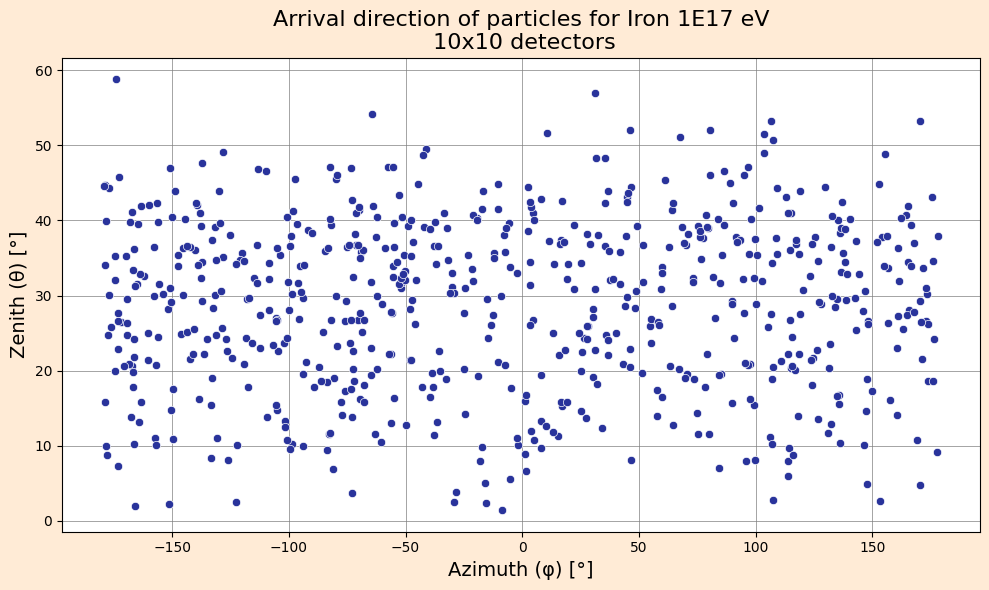

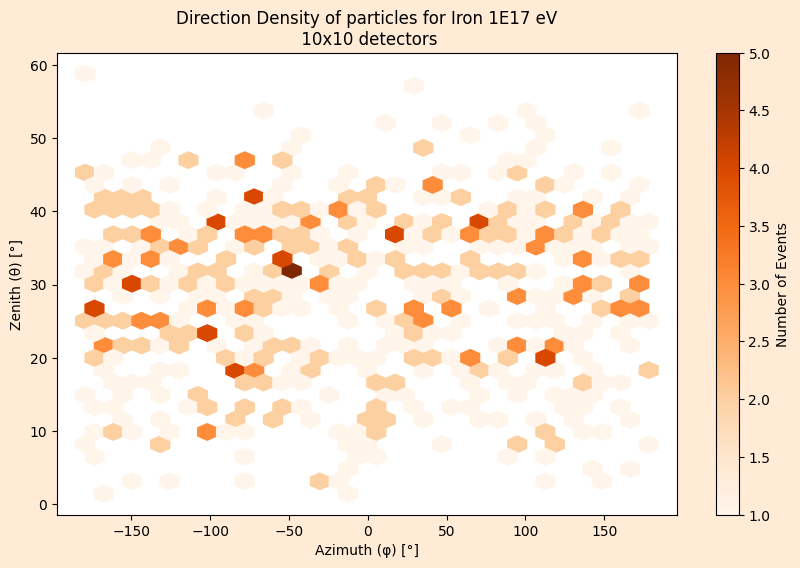

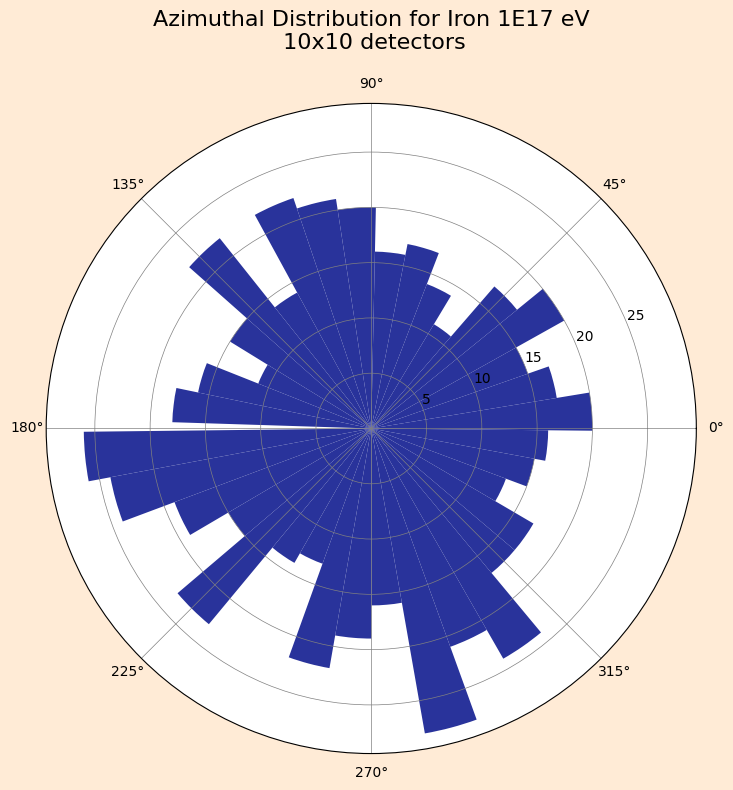

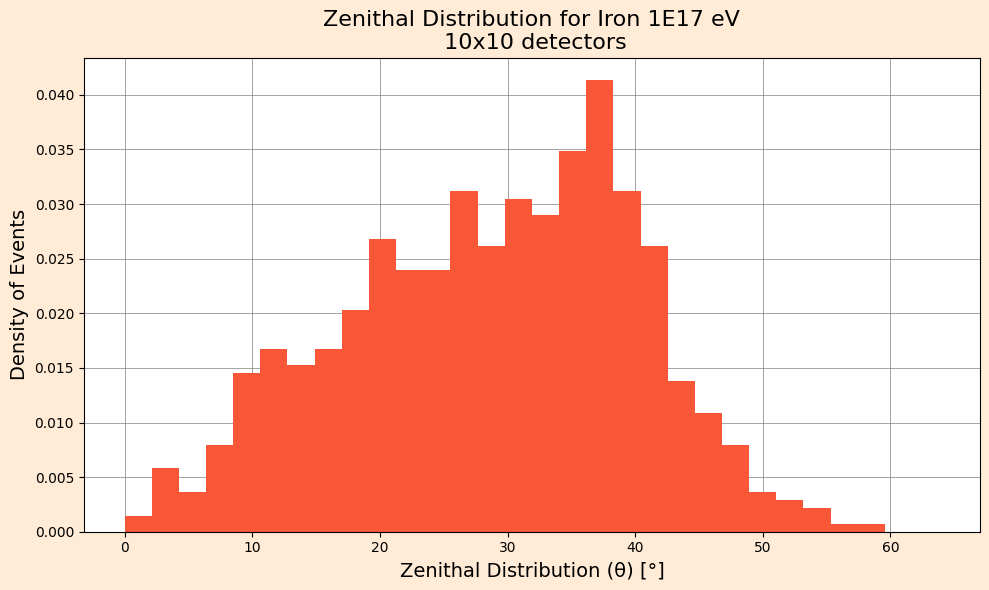

In [149]:
theta = np.array(theta_graus)  # Ângulos zenitais 
phi = np.array(phi_graus)      # Ângulos azimutais 

# Dispersão 2D
fig = plt.figure(figsize=(10, 6), facecolor='#FFEBD6')
ax = fig.add_subplot()
sns.scatterplot(x=phi, y=theta, color='#29339B', ax=ax)
ax.set_title('Arrival direction of particles for ' + str(name) + ' eV\n 10x10 detectors', fontsize=16)
ax.set_xlabel('Azimuth (φ) [°]', fontsize=14)
ax.set_ylabel('Zenith (θ) [°]', fontsize=14)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('plots/' + name.split(' ')[0].lower() + '/arrival_direction_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()

# Histograma 2D
plt.figure(figsize=(10,6), facecolor='#FFEBD6')
plt.hexbin(phi, theta, gridsize=30, cmap='Oranges', mincnt=1)
plt.colorbar(label='Number of Events')
plt.title('Direction Density of particles for ' + str(name) + ' eV\n 10x10 detectors')
plt.xlabel('Azimuth (φ) [°]')
plt.ylabel('Zenith (θ) [°]')
plt.savefig('plots/' + name.split(' ')[0].lower() + '/density_direction_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()

# Rosca Azimutal
fig = plt.figure(figsize=(8, 8), facecolor='#FFEBD6')
ax = fig.add_subplot(111, polar=True)
theta_rad = np.radians(phi)
ax.hist(theta_rad, bins=36, color='#29339B')
ax.set_theta_zero_location('E')
ax.set_theta_direction(1)
ax.set_title('Azimuthal Distribution for ' + str(name) + ' eV\n 10x10 detectors', fontsize=16, pad=20)
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('plots/' + name.split(' ')[0].lower() + '/azimuthal_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()

# Distribuição Zenital
fig = plt.figure(figsize=(10, 6), facecolor='#FFEBD6')
ax = fig.add_subplot()
ax.hist(theta, bins=30, range=(0,max(theta + 5)), density=True, color='#F95738')
ax.set_title('Zenithal Distribution for ' + str(name) + ' eV\n 10x10 detectors', fontsize=16)
ax.set_xlabel('Zenithal Distribution (θ) [°]', fontsize=14)
ax.set_ylabel('Density of Events', fontsize=14)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('plots/' + name.split(' ')[0].lower() + '/zenithal_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()

<Figure size 1200x600 with 0 Axes>

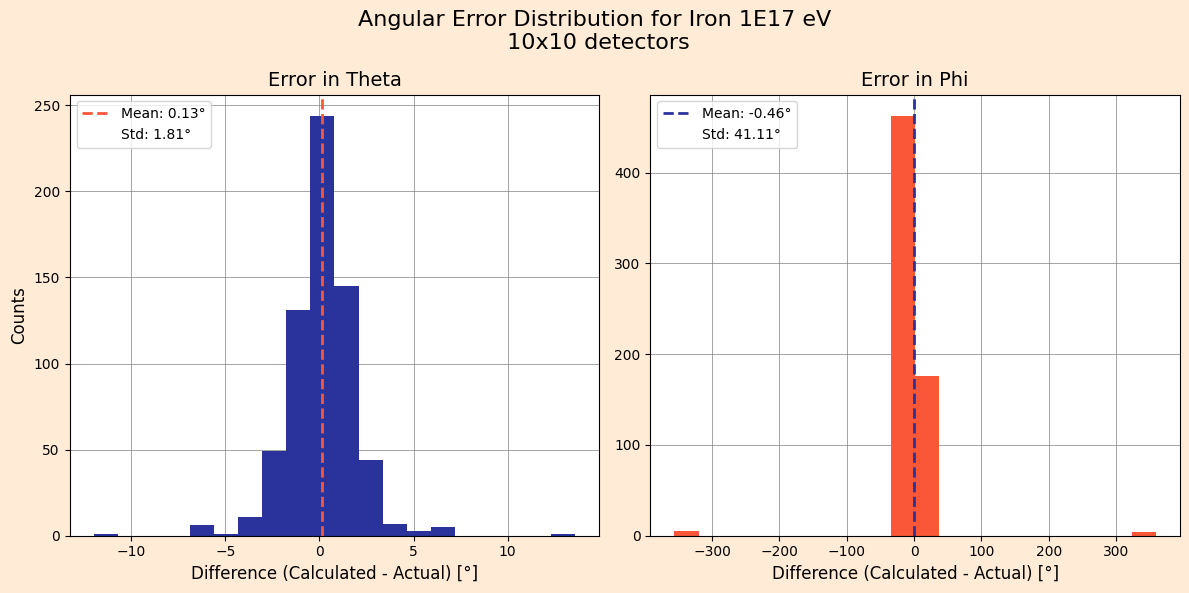

In [150]:
# Calcula a diferença dos ângulos reais e calculados
mask = pl.Series(range(len(angles))).is_in(valid_simulations)
angles_valid = angles.filter(mask)
dif_theta = np.array(angles_valid['theta']) - np.array(theta_graus)
dif_phi = np.array(angles_valid['phi']) - np.array(phi_graus)

plt.figure(figsize=(12, 6))

fig = plt.figure(figsize=(12, 6), facecolor='#FFEBD6')
fig.suptitle('Angular Error Distribution for ' + str(name) + ' eV\n 10x10 detectors', fontsize=16)

# Theta
ax1 = fig.add_subplot(121)
ax1.hist(dif_theta, bins=20, color='#29339B')
#ax1.axvline(np.mean(dif_theta), color='k', linestyle='dashed', linewidth=1)
ax1.set_title('Error in Theta', fontsize=14)
ax1.set_xlabel('Difference (Calculated - Actual) [°]', fontsize=12)
ax1.set_ylabel('Counts', fontsize=12)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='-', linewidth=0.5)
#ax1.text(0.65, 0.9, f'Média: {np.mean(dif_theta):.2f}°\nStd: {np.std(dif_theta):.2f}°', 
#        transform=ax1.transAxes, fontsize=10)
ax1.axvline(np.mean(dif_theta), color='#F95738', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(dif_theta):.2f}°')
ax1.plot([], [], ' ', label=f'Std: {np.std(dif_theta):.2f}°')
ax1.legend(loc='upper left', fontsize=10)
# Phi
ax2 = fig.add_subplot(122)
ax2.hist(dif_phi, bins=20, color='#F95738')
#ax2.axvline(np.mean(dif_phi), color='k', linestyle='dashed', linewidth=1)
ax2.set_title('Error in Phi', fontsize=14)
ax2.set_xlabel('Difference (Calculated - Actual) [°]', fontsize=12)
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)
#ax2.text(0.65, 0.9, f'Média: {np.mean(dif_phi):.2f}°\nStd: {np.std(dif_phi):.2f}°', 
#        transform=ax2.transAxes, fontsize=10)
ax2.axvline(np.mean(dif_phi), color='#29339B', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(dif_phi):.2f}°')
ax2.plot([], [], ' ', label=f'Std: {np.std(dif_phi):.2f}°')
ax2.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('plots/' + name.split(' ')[0].lower() + '/error_angles_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()

In [151]:
triangulation_particles = triangulation_particles.with_columns(mean_particles = pl.col('triangulation_particles').list.mean())  
trigs = triangulation_particles['mean_particles'].to_list()
triangulation_particles

TRIG,total_particles,time,triangulation_particles,triangulation_time,mean_particles
str,list[i64],list[f64],list[i64],list[f64],f64
"""TRIG1""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",58.868827
"""TRIG2""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",96.580247
"""TRIG3""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",87.674383
"""TRIG4""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",125.580247
"""TRIG5""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",127.191358
…,…,…,…,…,…
"""TRIG96""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",138.091049
"""TRIG97""","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",135.138889
"""TRIG98""","[529, 0, … 0]","[175547.0, 0.0, … 0.0]","[0, 0, … 0]","[0.0, 0.0, … 0.0]",89.973765


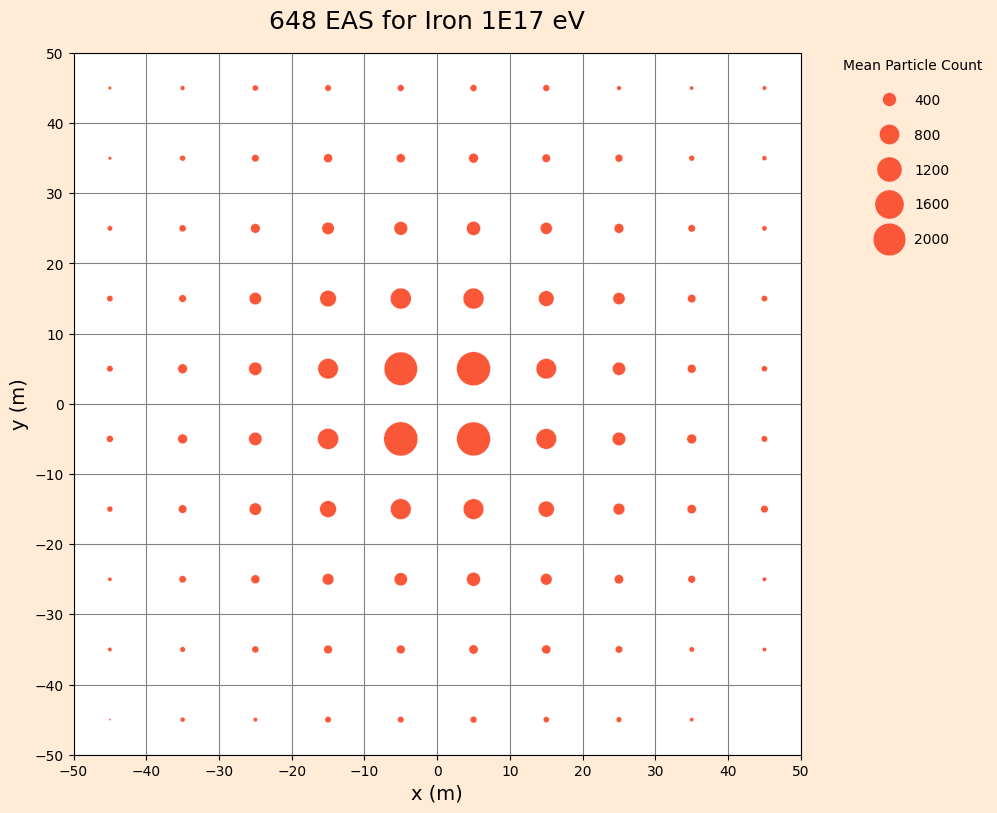

In [152]:
# Plot de partículas por tanque
fig, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = '#FFEBD6')
fig.suptitle(str(angles_valid.height) + ' EAS for ' + str(name) + ' eV', size = 18)
fig.tight_layout()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')
ax.xaxis.grid(color='gray', linestyle='-')

scatter = sns.scatterplot(x = x_det, y = y_det, ax = ax, color = '#F95738', size=trigs, sizes=(0, 600), legend = 'brief')
handles, labels = scatter.get_legend_handles_labels()
for handle in handles:
    handle.set_color('#F95738')
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
           frameon=False, title='Mean Particle Count', labelspacing = 1.5)

plt.xticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
plt.yticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
ax.set_xlabel('x (m)', size = 14)
ax.set_ylabel('y (m)', size = 14)


plt.savefig('plots/' + name.split(' ')[0].lower() + '/counts_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

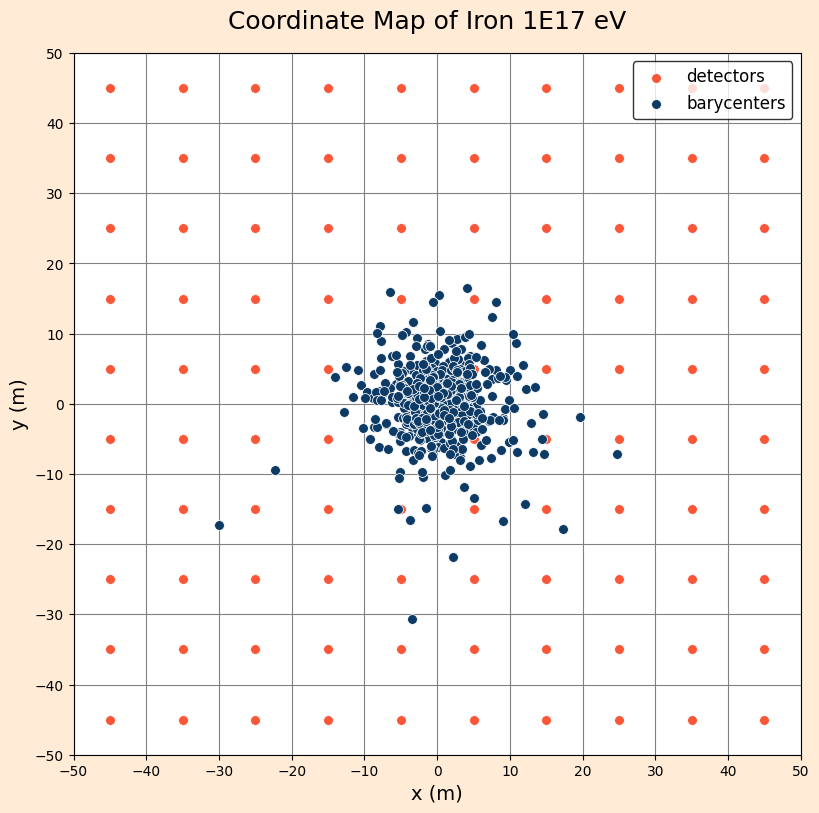

In [153]:
# Posição dos baricentros
x_b = [0] * len(valid_simulations)
y_b = [0] * len(valid_simulations)
rho = []

for i in range(len(valid_simulations)):
        numerator = 0
        numerator1 = 0
        denominator = 0
        for j in range(len(trigs)):
                numerator += (triangulation_particles['triangulation_particles'][j][i]*x_det[j])
                numerator1 += (triangulation_particles['triangulation_particles'][j][i]*y_det[j])
                denominator += (triangulation_particles['triangulation_particles'][j][i])
                rho.append((triangulation_particles['triangulation_particles'][j][i])/1)
                if denominator != 0: 
                    x_b[i] = numerator / denominator
                    y_b[i] = numerator1 / denominator
                else:
                    x_b[i] = 0 
                    y_b[i] = 0 

fig, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = '#FFEBD6')
fig.suptitle('Coordinate Map of ' + str(name) + ' eV', size = 18)
fig.tight_layout()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')
ax.xaxis.grid(color='gray', linestyle='-')

sns.scatterplot(x = x_det, y = y_det, ax = ax, color = '#F95738', s = 50)
sns.scatterplot(x = x_b, y = y_b, ax = ax, color = '#0D3B66',s = 50)

plt.xticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
plt.yticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
ax.set_xlabel('x (m)', size = 14)
ax.set_ylabel('y (m)', size = 14)


ax.legend(['detectors', 'barycenters'], edgecolor = 'black', fontsize = 12, loc = 1)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/map_' + caminho_arquivo.split('/')[-1].split('_')[0] + '_array.pdf',bbox_inches = 'tight', dpi = 600)

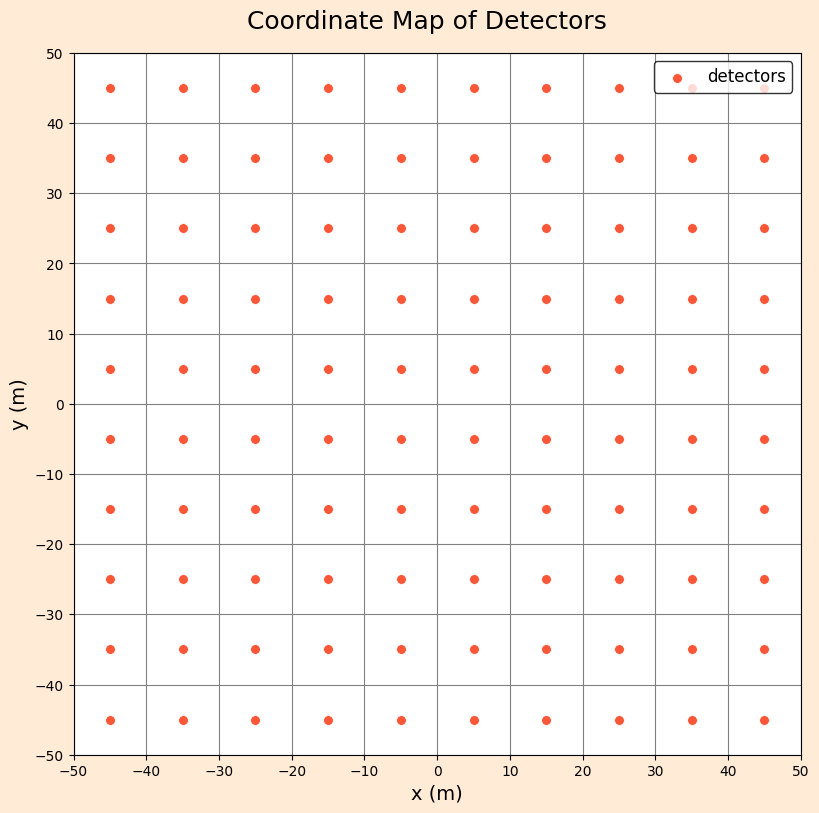

In [154]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = '#FFEBD6')
fig.suptitle('Coordinate Map of Detectors', size = 18)
fig.tight_layout()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')
ax.xaxis.grid(color='gray', linestyle='-')

sns.scatterplot(x = x_det, y = y_det, ax = ax, color = '#F95738', s = 50)

plt.xticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
plt.yticks(ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
ax.set_xlabel('x (m)', size = 14)
ax.set_ylabel('y (m)', size = 14)


ax.legend(['detectors'], edgecolor = 'black', fontsize = 12, loc = 1)

In [155]:
i = 4
eas = 1000
area_detectores = 100
area_total = (np.pi*100**2)
total_particles = [7270338, 1.057834e+07, 1.68948e+08, 7.3047e+08, 2.89583e+09]
part = total_particles[i]/eas * (area_detectores/area_total)
part

9217.713177076066

[3.89361953e+05 1.71865021e+00]
[1.21273052 2.33443268 2.65418483 3.45707867 3.79523746]


C:\Users\Lucas\AppData\Local\Temp\ipykernel_12708\1472072476.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title = 'k = {:.2e} $\pm$ {:.2e}\np = {:.2f} $\pm$ {:.2f}'


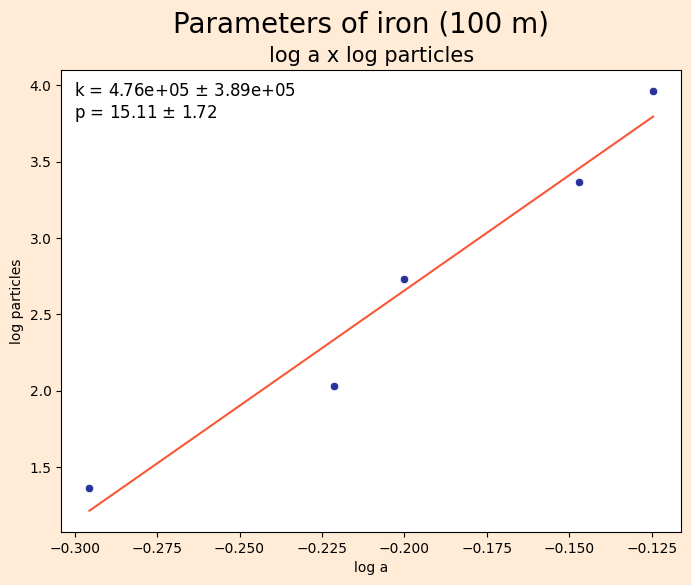

In [156]:
from scipy.optimize import curve_fit

# Fit do ferro

a = [0.5064, 0.6008, 0.6308, 0.7129, 0.7506]

particles = [23.142204612976883, 106.5566519434633, 537.7781865097907, 2325.158225606736, 9217.713177076066]

E = [1E15, 3.16E15, 1E16, 3.16E16, 1E17]

loga = np.log10(a)
logparticles = np.log10(particles)
#logE = np.log10(E)


fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
fig.suptitle('Parameters of iron (100 m)', size = 20)
#fig.tight_layout()


ax.set_title('log a x log particles', size = 15)
ax.set_xlabel('log a')
ax.set_ylabel('log particles')
ax.set_facecolor('white')


#Fit
def power(x, k, p):
    return np.log10(k*x**p)

initial_guess = [1,1]

coefficients_iron, cov = curve_fit(power, a, np.log10(particles), p0=initial_guess)

inc = np.sqrt(np.diag(cov))
print(np.sqrt(np.diag(cov)))

print(power(a,*coefficients_iron))

ax.plot(loga, power(a,*coefficients_iron), color = '#F95738')
sns.scatterplot(x = loga, y = logparticles, color = '#29339B', ax = ax)

ax.legend(title = 'k = {:.2e} $\pm$ {:.2e}\np = {:.2f} $\pm$ {:.2f}'
          .format(coefficients_iron[0],inc[0],coefficients_iron[1],inc[1]),
          title_fontsize = 12,facecolor = 'white', frameon = False)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/parameter_a_' + name.split(' ')[0].lower() + '_array.pdf',bbox_inches = 'tight', dpi = 600)

In [157]:
r_b = [] 

# Estruturação da lista rho para 100 tanques
rho_reshaped = np.array(rho).reshape(len(x_b), 100)


for i in range(len(valid_simulations)):
    #aux = ((x_det[i]-x_b[i])**2 + (y_det[i]-y_b[i])**2)**0.5
    aux = x_b[i]** 2 + y_b[i]**2
    r_b.append(aux)

data = {
    'x_b':x_b,
    'y_b':y_b,
    'r_b':r_b
}

for i in range(100):
    data[f'rho_{i+1}'] = rho_reshaped[:, i].tolist()

df = pl.DataFrame(data, strict=False)

rho_cols = [pl.col(f'rho_{i+1}') for i in range(100)]

df = df.with_columns(
    rho_total=pl.sum_horizontal(rho_cols)        
)

df = df.with_columns(
    particles_total=pl.col('rho_total') * 1
)

df = df.with_columns(
    a=(pl.col("particles_total") / coefficients_iron[0]).pow(1 / coefficients_iron[1])
)

distance_bary = []
for i in range(100):
    x = x_det[i]
    y = y_det[i]
    expr = ((pl.col("x_b") - x)**2 + (pl.col("y_b") - y)**2).sqrt().alias(f"r{i+1}_b")
    distance_bary.append(expr)

df = df.with_columns(distance_bary)

# Reordenar colunas
df = df.select([
    'x_b', 
    'y_b', 
    'r_b', 
    'rho_total', 
    'particles_total', 
    'a',
    *[f'r{i+1}_b' for i in range(100)],
    *[f'rho_{i+1}' for i in range(100)]
])

df

x_b,y_b,r_b,rho_total,particles_total,a,r1_b,r2_b,r3_b,r4_b,r5_b,r6_b,r7_b,r8_b,r9_b,r10_b,r11_b,r12_b,r13_b,r14_b,r15_b,r16_b,r17_b,r18_b,r19_b,r20_b,r21_b,r22_b,r23_b,r24_b,r25_b,r26_b,r27_b,r28_b,r29_b,r30_b,r31_b,…,rho_64,rho_65,rho_66,rho_67,rho_68,rho_69,rho_70,rho_71,rho_72,rho_73,rho_74,rho_75,rho_76,rho_77,rho_78,rho_79,rho_80,rho_81,rho_82,rho_83,rho_84,rho_85,rho_86,rho_87,rho_88,rho_89,rho_90,rho_91,rho_92,rho_93,rho_94,rho_95,rho_96,rho_97,rho_98,rho_99,rho_100
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-1.22974,-0.599885,1.872123,41708.0,41708.0,0.851152,62.347461,55.783516,50.36264,46.486453,44.559904,44.83503,47.273404,51.569075,57.305884,64.098043,55.670491,48.205792,41.813792,37.053852,34.606109,34.959656,38.036461,43.259302,49.959604,57.624273,50.111887,41.662886,34.06451,28.017596,24.689684,25.182837,29.304779,35.824082,43.680198,52.273841,46.078183,…,0.0,641.0,766.0,0.0,1956.0,0.0,0.0,0.0,0.0,0.0,0.0,439.0,0.0,0.0,1235.0,0.0,0.0,70.0,0.0,0.0,0.0,1223.0,0.0,1307.0,0.0,0.0,0.0,0.0,0.0,885.0,0.0,0.0,0.0,0.0,0.0,0.0,522.0
-0.834743,0.531704,0.979505,34286.0,34286.0,0.840185,63.432689,56.924519,51.547024,47.68428,45.721827,45.904033,48.206588,52.350454,57.941909,64.60619,56.683965,49.292664,42.970474,38.251229,35.77501,36.007585,38.900399,43.931036,50.464154,57.994186,51.014094,42.651292,35.154339,29.197986,25.869234,26.189924,30.043418,36.322195,43.999963,52.466099,46.816704,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.0,0.0,623.0,0.0,0.0,1210.0,0.0,0.0,0.0,0.0,1075.0,532.0,0.0,0.0,0.0,0.0,768.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0
-1.499285,-0.542259,2.541901,66435.0,66435.0,0.877784,62.199702,55.666764,50.28692,46.462458,44.595355,44.930295,47.42064,51.756186,57.521201,64.332528,55.494577,48.05865,41.708746,37.008177,34.635111,35.065319,38.204218,43.468931,50.194957,57.875033,49.904842,41.478657,33.918501,27.936542,24.707005,25.306556,29.502669,36.060965,43.936077,52.539172,45.840359,…,3415.0,1674.0,994.0,1025.0,0.0,0.0,0.0,800.0,0.0,488.0,2029.0,0.0,732.0,1990.0,0.0,0.0,249.0,0.0,0.0,0.0,0.0,698.0,0.0,0.0,1105.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,934.0,34.0,0.0,0.0
-1.684064,-1.38122,4.743839,45601.0,45601.0,0.856194,61.4725,54.886698,49.459386,45.606054,43.744639,44.127936,46.700706,51.133524,56.994022,63.89053,54.831494,47.330476,40.912776,36.159875,33.781916,34.276801,37.531059,42.921576,49.758848,57.529334,49.336772,40.838687,33.188547,27.113851,23.850413,24.546354,28.917205,35.635461,43.62989,52.318721,45.406404,…,417.0,1397.0,710.0,738.0,474.0,450.0,0.0,0.0,695.0,455.0,2250.0,0.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,524.0,0.0,0.0,0.0,538.0,0.0,405.0,0.0,0.0,0.0,0.0,573.0,0.0,0.0,0.0,0.0,0.0,0.0
0.729976,-0.38674,0.682432,79304.0,79304.0,0.888131,63.887195,57.157451,51.50121,47.305128,44.979725,44.817141,46.839904,50.787568,56.256356,62.850442,57.352493,49.746447,43.128986,38.019862,35.084333,34.875649,37.439436,42.274246,48.708442,56.19531,51.933065,43.387138,35.6068,29.210353,25.271431,24.980907,28.450768,34.566554,42.192975,50.652222,48.008104,…,0.0,2294.0,0.0,0.0,0.0,1707.0,499.0,0.0,1.0,729.0,1286.0,1.0,892.0,432.0,440.0,855.0,0.0,1240.0,1868.0,0.0,0.0,570.0,597.0,0.0,0.0,0.0,872.0,0.0,0.0,0.0,0.0,672.0,0.0,0.0,0.0,660.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1.75054,2.31766,8.435938,41173.0,41173.0,0.850425,64.1052,57.831544,52.720947,49.137655,47.429104,47.796765,50.195035,54.355794,59.912963,66.517471,57.123756,49.981339,43.967546,39.599948,37.458867,37.923311,40.904625,45.91513,52.375662,59.818231,51.154377,43.032326,35.871882,30.361204,27.510244,28.139373,32.044268,38.234094,45.791448,54.146722,46.587735,…,649.0,0.0,525.0,2459.0,476.0

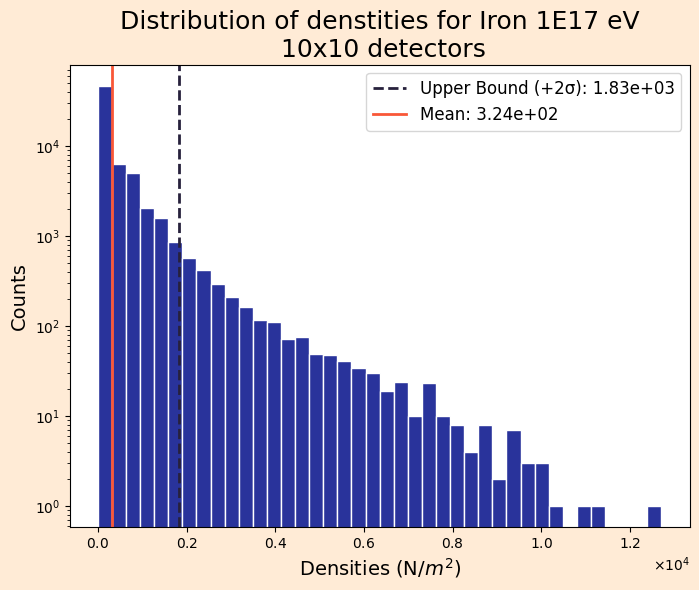

In [158]:

rho_columns = [f"rho_{i+1}" for i in range(100)] 
values = df.select(rho_columns).to_numpy().flatten()  

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')
plt.hist(values, color='#29339B', bins=40, edgecolor='white')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
ax.set_yscale('log')


plt.title('Distribution of denstities for ' + str(name) + ' eV\n 10x10 detectors', size=18)  

# Calcula a média e o desvio padrão dos dados
mean = values.mean()
std = values.std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2e}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2e}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Densities (N/$m^2$)', size=14)
ax.set_ylabel('Counts', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/densities_distribution' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)


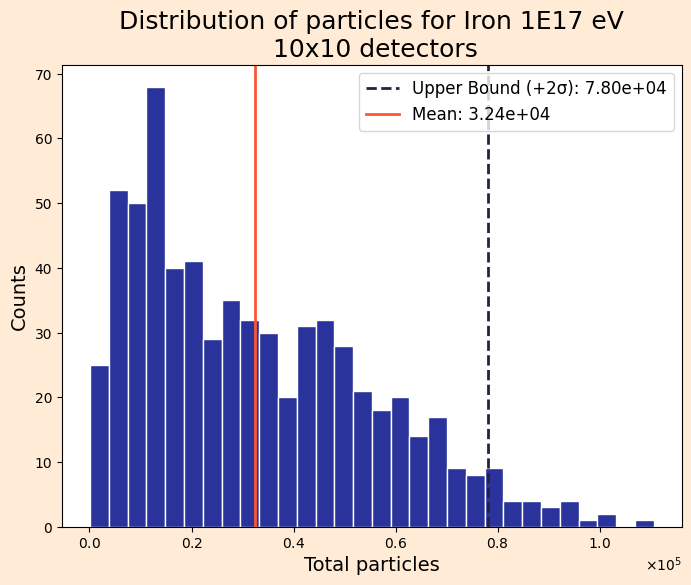

In [159]:
values = df.select('particles_total').to_numpy().flatten()  

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#FFEBD6')
plt.hist(values, color='#29339B', bins=30, edgecolor='white')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


plt.title('Distribution of particles for ' + str(name) + ' eV\n 10x10 detectors', size=18)  

# Calcula a média e o desvio padrão dos dados
mean = values.mean()
std = values.std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2e}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2e}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Total particles', size=14)
ax.set_ylabel('Counts', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/particles_densities_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

In [160]:
# Modelagem NKG
def model(r, C, a, b):
    r0 = 78
    return C/(r0**2)*(r/r0)**(-a)*(1+r/r0)**(-b)


parameters = []
uncertainties = []
r_squared_list = []
rmse_list = []

x_cols = [f"r{i+1}_b" for i in range(100)]  
y_cols = [f"rho_{i+1}" for i in range(100)] 

x = df.select(x_cols).to_numpy()
y = df.select(y_cols).to_numpy()

a_std = df['a'].std()

#for i in range(len(x)):
#    print(f"Linha {i}: x = {x[i]}, y = {y[i]}")

for i in range(len(x)):
    r = x[i].flatten()  
    rho = y[i].flatten()
    a_fixed = df['a'][i]

    try:
        
        def current_model(r, C, b):
            return model(r, C, a_fixed, b)
        
        popt, pcov = curve_fit(current_model, r, rho, p0= [1E5, 3] , bounds= ([0, 2.5], [np.inf, 4.0]))
        perr = np.sqrt(np.diag(pcov))

        # Cálculo das métricas
        y_pred = current_model(r, *popt)

        # R²
        ss_res = np.sum((rho - y_pred)**2)
        ss_tot = np.sum((rho - np.mean(rho))**2)
        r_sq = 1 - (ss_res/ss_tot) if ss_tot != 0 else np.nan

        # RMSE
        rmse = np.sqrt(np.mean((rho - y_pred)**2))

        parameters.append([popt[0], a_fixed, popt[1]])
        uncertainties.append([perr[0], a_std, perr[1]])
        #parameters.append(popt)
        #uncertainties.append(perr)
        r_squared_list.append(r_sq)
        rmse_list.append(rmse)
    except RuntimeError:
        parameters.append([np.nan, np.nan])
        uncertainties.append([np.nan, np.nan])
        r_squared_list.append(np.nan)
        rmse_list.append(np.nan)


# Cria DataFrame com todos os parâmetros
parameters_df = pl.DataFrame({
    'C': [p[0] for p in parameters],
    'a': [p[1] for p in parameters],
    'b': [p[2] for p in parameters],
    'C_err': [e[0] for e in uncertainties],
    'a_err': [e[1] for e in uncertainties],
    'b_err': [e[2] for e in uncertainties],
    'R_2': r_squared_list,
    'RMSE': rmse_list
})

# Filtra valores válidos para estatísticas
valid = parameters_df.filter(
    pl.all_horizontal(
        pl.col('C').is_not_nan(),
        pl.col('a').is_not_nan(),
        pl.col('b').is_not_nan()
    )
)
print(parameters_df)

print("\nEstatísticas dos parâmetros:")
print(f"C: Média = {valid['C'].mean():.2e} ± {valid['C'].std():.2e}")
print(f"a: Média = {valid['a'].mean():.2f} ± {valid['a'].std():.2f}")
print(f"b: Média = {valid['b'].mean():.2f} ± {valid['b'].std():.2f}")
print(f"R² Médio = {valid['R_2'].mean():.3f} ± {valid['R_2'].std():.3f}")
print(f"RMSE Médio = {valid['RMSE'].mean():.3e} ± {valid['RMSE'].std():.3e}")

shape: (648, 8)
┌──────────┬──────────┬──────────┬───────────────┬──────────┬──────────┬──────────┬────────────┐
│ C        ┆ a        ┆ b        ┆ C_err         ┆ a_err    ┆ b_err    ┆ R_2      ┆ RMSE       │
│ ---      ┆ ---      ┆ ---      ┆ ---           ┆ ---      ┆ ---      ┆ ---      ┆ ---        │
│ f64      ┆ f64      ┆ f64      ┆ f64           ┆ f64      ┆ f64      ┆ f64      ┆ f64        │
╞══════════╪══════════╪══════════╪═══════════════╪══════════╪══════════╪══════════╪════════════╡
│ 2.3974e6 ┆ 0.851152 ┆ 2.5      ┆ 344286.907787 ┆ 0.048902 ┆ 0.770819 ┆ 0.467002 ┆ 516.458326 │
│ 4.0161e6 ┆ 0.840185 ┆ 4.0      ┆ 484755.190126 ┆ 0.048902 ┆ 0.785814 ┆ 0.668586 ┆ 540.528574 │
│ 3.7307e6 ┆ 0.877784 ┆ 2.5      ┆ 489359.82789  ┆ 0.048902 ┆ 0.723266 ┆ 0.52096  ┆ 783.094656 │
│ 2.6922e6 ┆ 0.856194 ┆ 2.5      ┆ 367074.584285 ┆ 0.048902 ┆ 0.755049 ┆ 0.496629 ┆ 591.57415  │
│ 4.6045e6 ┆ 0.888131 ┆ 2.712408 ┆ 534981.563577 ┆ 0.048902 ┆ 0.657158 ┆ 0.594928 ┆ 815.444024 │
│ …        ┆ …

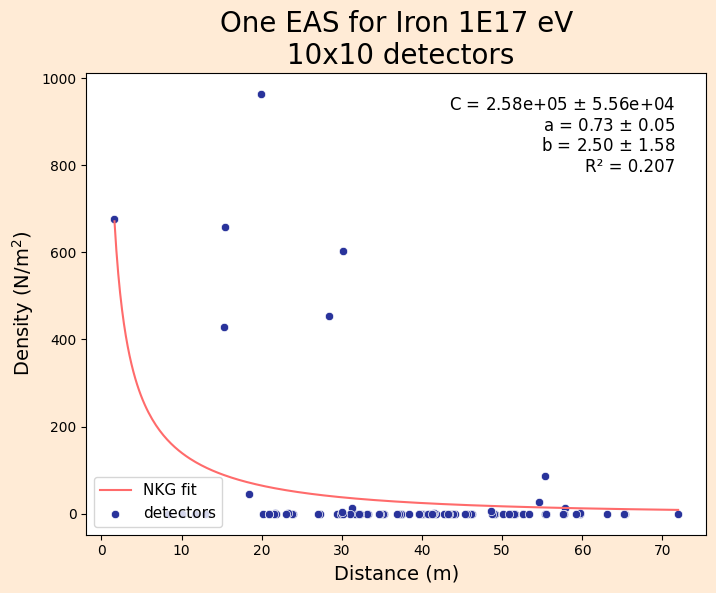

In [161]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.title('One EAS for ' + str(name) + ' eV\n 10x10 detectors', size = 20)
#fig.tight_layout()


#ax.set_title('log C x log E', size = 15)
ax.set_xlabel('Distance (m)', size = 14)
ax.set_ylabel('Density (N/m$^2$)', size = 14)
ax.set_facecolor('white')

i = 10

C = parameters_df['C'][i]
a = parameters_df['a'][i]
b = parameters_df['b'][i]
a_err = parameters_df['a_err'][i]
C_err = parameters_df['C_err'][i]
b_err = parameters_df['b_err'][i]

r_smooth = np.linspace(min(x[i]), max(x[i]), 300)
rho_fit = model(r_smooth, C, a, b)

sns.lineplot(x=r_smooth, y=rho_fit, color='#FF6B6B', ax=ax, label='NKG fit')

sns.scatterplot(x = x[i], y = y[i], color = '#29339B', ax = ax, label = 'detectors')

textstr = f'C = {C:.2e} $\pm$ {C_err:.2e}\na = {a:.2f} $\pm$ {a_err:.2f}\nb = {b:.2f} $\pm$ {b_err:.2f}\nR² = {parameters_df["R_2"][i]:.3f}'

ax.text(0.95, 0.95, textstr, transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='right',
        fontsize = 12
        )

ax.legend(
    loc='lower left',
    fontsize=11,
    frameon=True,
    facecolor='white',
)
plt.savefig('plots/' + name.split(' ')[0].lower() + '/one_eas_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)
plt.show()


Correlação θ-R²: -0.6279
Correlação φ-R²: -0.0203


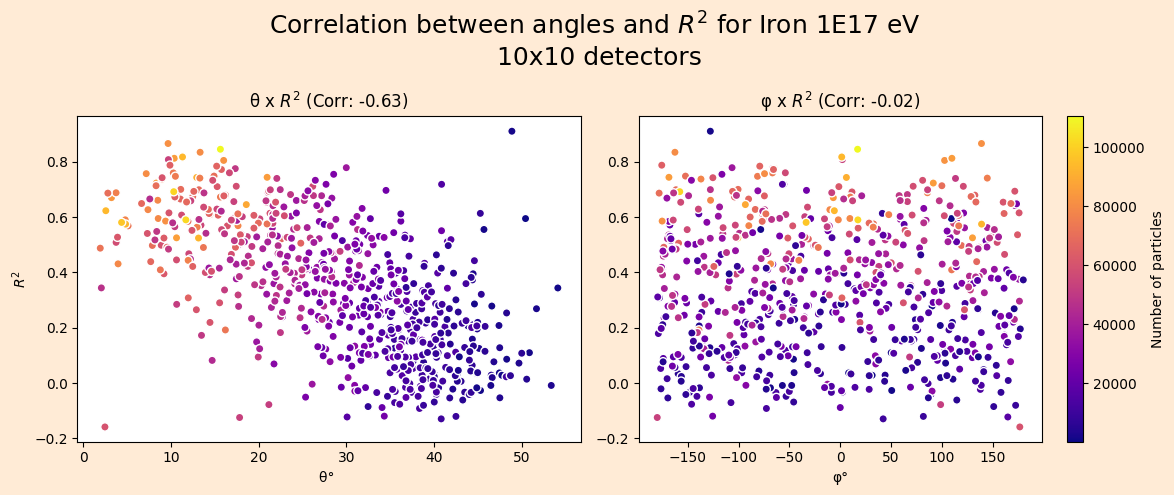

In [162]:
theta = angles_valid['theta']
phi = angles_valid['phi']
R2 = parameters_df['R_2']
n_particles = []
for i in range(len(angles_valid['theta'])):
    trigs_i = [row[i] for row in triangulation_particles['triangulation_particles']]
    n_particles.append(sum(trigs_i))

combined_df = pl.DataFrame({
    "theta": theta,
    "phi": phi,
    "R2": R2,
    "n_particles": n_particles
})

corr_theta = combined_df.select(pl.corr("theta", "R2")).item()
corr_phi = combined_df.select(pl.corr("phi", "R2")).item()

print(f"Correlação θ-R²: {corr_theta:.4f}")
print(f"Correlação φ-R²: {corr_phi:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5), facecolor='#FFEBD6')
fig.suptitle('Correlation between angles and $R^2$ for ' + str(name) + ' eV\n 10x10 detectors', fontsize=18)

ax[0].scatter(
    combined_df["theta"].to_numpy(),
    combined_df["R2"].to_numpy(),
    c = n_particles,
    cmap = 'plasma',
    #alpha=0.6,
    edgecolor='w'
)
ax[0].set_title(f"θ x $R^2$ (Corr: {corr_theta:.2f})")
ax[0].set_xlabel("θ° ")
ax[0].set_ylabel("$R^2$")

phi_scatter = ax[1].scatter(
    combined_df["phi"].to_numpy(),
    combined_df["R2"].to_numpy(),
    c = n_particles,
    cmap = 'plasma',
    #alpha=0.6,
    edgecolor='w',
    #color='orange'
)
ax[1].set_title(f"φ x $R^2$ (Corr: {corr_phi:.2f})")
ax[1].set_xlabel("φ°")

cbar = fig.colorbar(phi_scatter, ax=ax[1])
cbar.set_label('Number of particles', fontsize=10)

plt.tight_layout()
plt.savefig('plots/' + name.split(' ')[0].lower() + '/corr_angle_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)


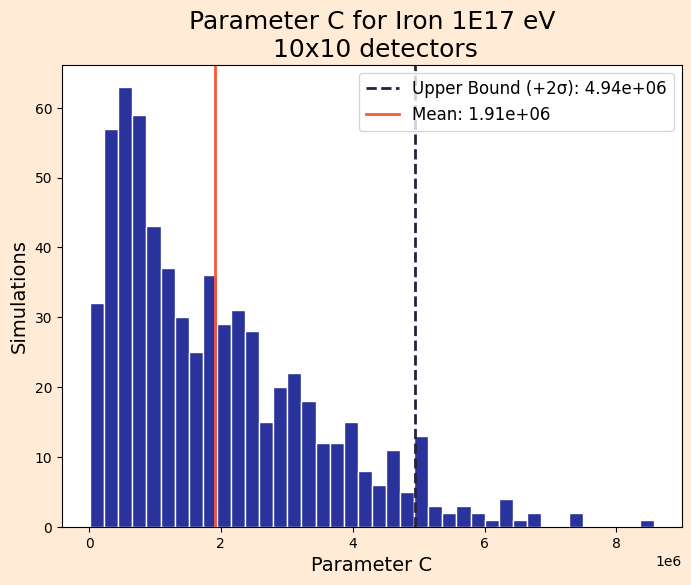

In [163]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(parameters_df['C'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('C')
plt.title('Parameter C for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

# Calcula a média e o desvio padrão dos dados
mean = parameters_df['C'].mean()
std = parameters_df['C'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2e}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2e}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Parameter C', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/par_c_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

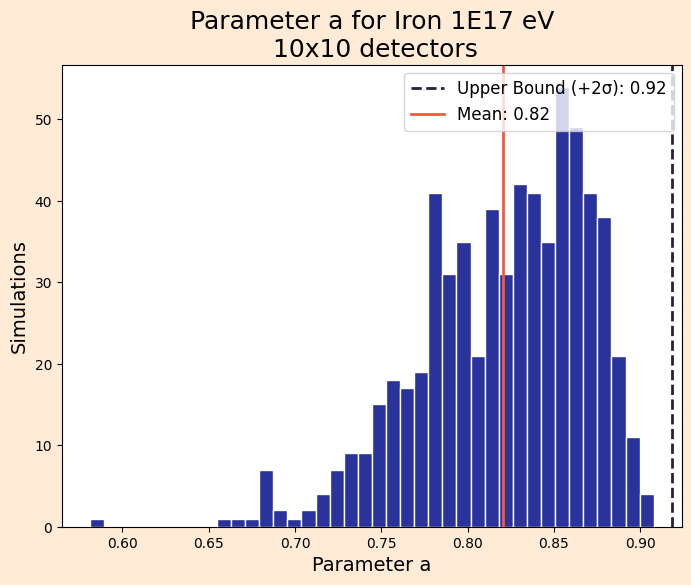

In [164]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(parameters_df['a'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('a')
plt.title('Parameter a for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

# Calcula a média e o desvio padrão dos dados
mean = parameters_df['a'].mean()
std = parameters_df['a'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2f}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Parameter a', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/par_a_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

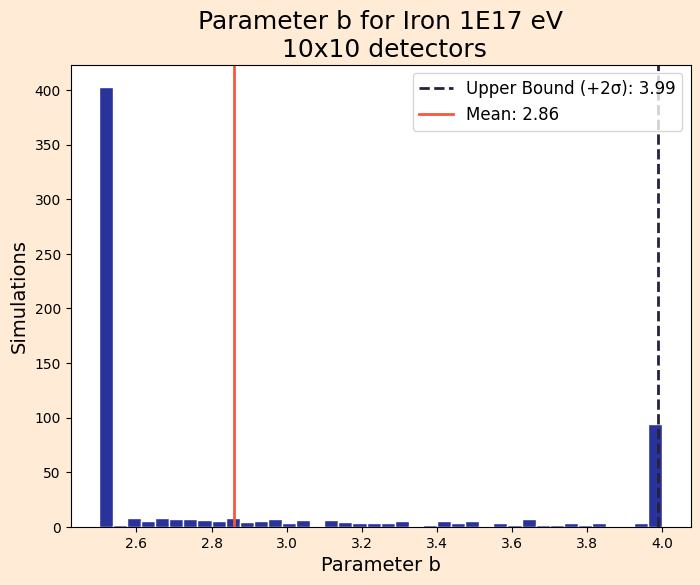

In [165]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(parameters_df['b'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('a')
plt.title('Parameter b for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

# Calcula a média e o desvio padrão dos dados
mean = parameters_df['b'].mean()
std = parameters_df['b'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2f}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Parameter b', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/par_b_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

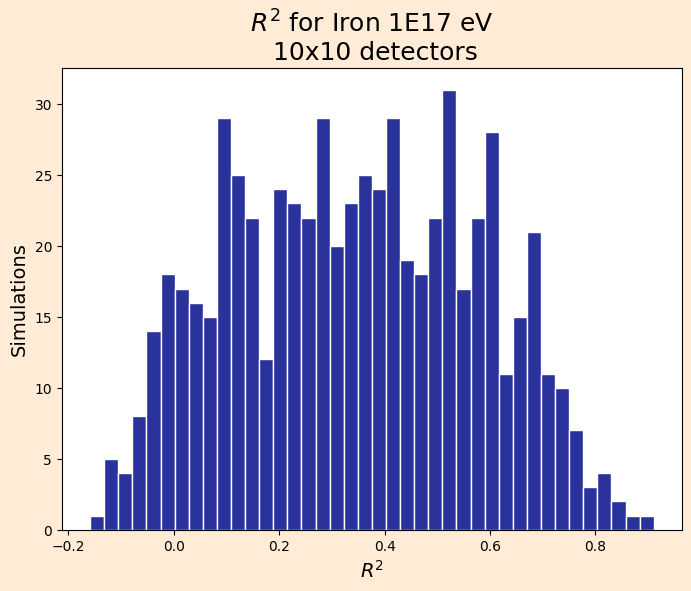

In [166]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(parameters_df['R_2'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('$R^2$')
plt.title('$R^2$ for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

ax.set_xlabel('$R^2$', size=14)
ax.set_ylabel('Simulations', size=14)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/rsquared_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

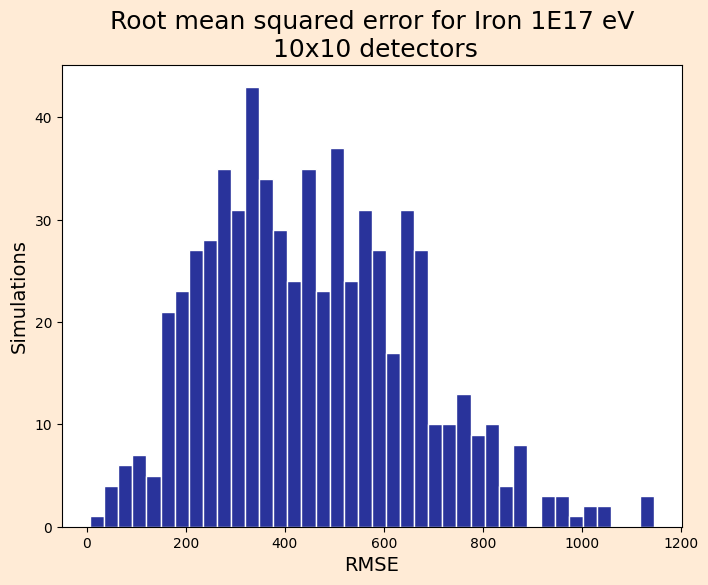

In [167]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(parameters_df['RMSE'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('RMSE')
plt.title('Root mean squared error for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

ax.set_xlabel('RMSE', size=14)
ax.set_ylabel('Simulations', size=14)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/rmse_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

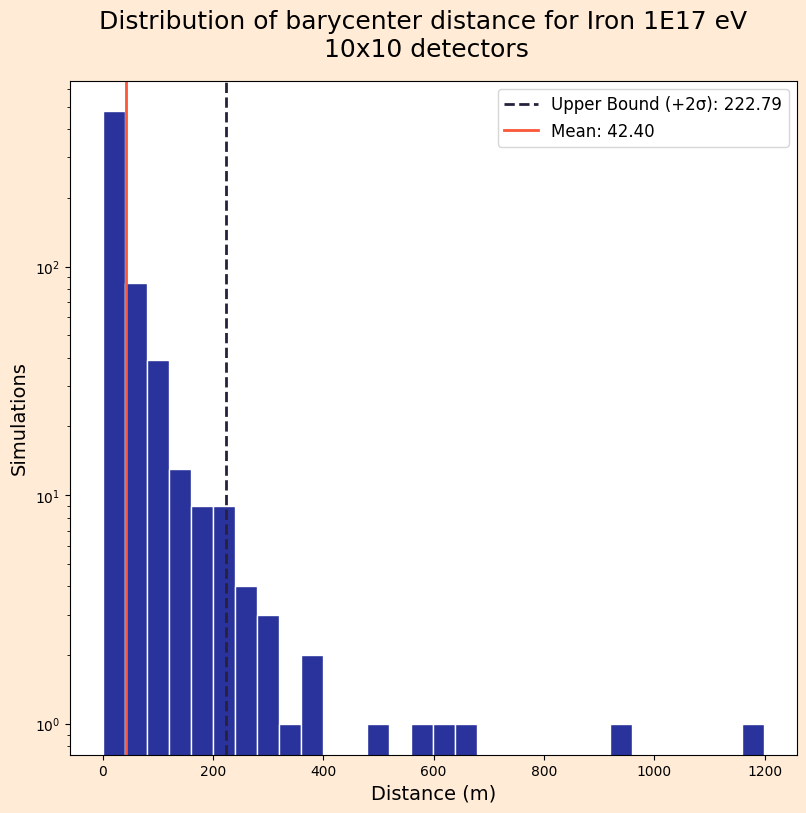

In [168]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = '#FFEBD6')
fig.suptitle('Distribution of barycenter distance for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
fig.tight_layout()
ax.set_yscale('log')

# Calcula a média e o desvio padrão dos dados
mean = df['r_b'].mean()
std = df['r_b'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

plt.hist(df['r_b'], color = '#29339B', edgecolor = 'white', bins = 30)

# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2f}')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')

# Personaliza o eixo e a legenda
ax.set_xlabel('Distance (m)', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() + '/barycenter_distribution_' + caminho_arquivo.split('/')[-1] + '_array.pdf', bbox_inches = 'tight', dpi = 600)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12708\1870954292.py:23: RuntimeWarning: invalid value encountered in log10
  return np.log10(k*x**p)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_12708\1870954292.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title = 'k = {:.2e} $\pm$ {:.2e}\np = {:.2f} $\pm$ {:.2f}'


[3.27083266e-16 2.86895568e-02]
[3.74747826 4.38898643 5.03129807 5.67280624 6.31511788]


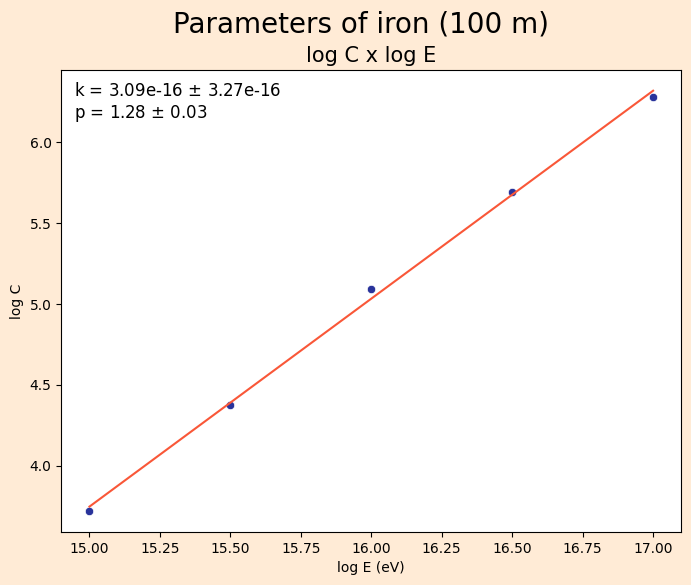

In [169]:
# Fit do ferro

C = [5273, 2.385e+04, 1.235e+05, 4.878e+05, 1.889e+06]
E = [1E15, 3.16E15, 1E16, 3.16E16, 1E17]

logC = np.log10(C)
logE = np.log10(E)


fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
fig.suptitle('Parameters of iron (100 m)', size = 20)
#fig.tight_layout()


ax.set_title('log C x log E', size = 15)
ax.set_xlabel('log E (eV)')
ax.set_ylabel('log C')
ax.set_facecolor('white')


#Fit
def power(x, k, p):
    return np.log10(k*x**p)

initial_guess = [1,1]

coefficients_iron, cov = curve_fit(power, E, np.log10(C), p0=initial_guess)

inc = np.sqrt(np.diag(cov))
print(np.sqrt(np.diag(cov)))

print(power(E,*coefficients_iron))

ax.plot(logE, power(E,*coefficients_iron), color = '#F95738')
sns.scatterplot(x = logE, y = logC, color = '#29339B', ax = ax)

ax.legend(title = 'k = {:.2e} $\pm$ {:.2e}\np = {:.2f} $\pm$ {:.2f}'
          .format(coefficients_iron[0],inc[0],coefficients_iron[1],inc[1]),
          title_fontsize = 12,facecolor = 'white', frameon = False)


logE_0_array = ((np.log10(C/coefficients_iron[0]))/coefficients_iron[1])

logE_0 = logE_0_array.tolist()

data = {
    'logC':logC,
    'logE_S':logE,
    'logE_R':logE_0
}

df = pl.DataFrame(data)

df = df.with_columns(
        abs((((pl.col('logE_R')-pl.col('logE_S'))/pl.col('logE_S'))*100)).alias('error (%)')
)
df
plt.savefig('plots/' + name.split(' ')[0].lower() + '/parameter_c_' + name.split(' ')[0].lower() + '_array.pdf',bbox_inches = 'tight', dpi = 600)

In [170]:
k_iron = coefficients_iron[0] #- inc[0]
p_iron = coefficients_iron[1] #- inc[1]
c_iron = parameters_df['C'] #- parameters_df['C_err']

E_iron = []
E_real = float(name.split(' ')[1])

erro_relativo = []
erro_absoluto = []

for i in range(len(c_iron)):
    E = (c_iron[i] / k_iron) ** (1 / p_iron)
    E_iron.append(E)
    
    # Calcular erro absoluto
    erro_abs = abs(E - E_real)
    erro_absoluto.append(erro_abs)
    
    # Calcular erro relativo (em porcentagem)
    erro_rel = (erro_abs / E_real) * 100
    erro_relativo.append(erro_rel)

data = {
    'E':E_iron,
    'Relative_error':erro_relativo,
    'Absolute_error':erro_absoluto
}

df3 = pl.DataFrame(data)
df3

E,Relative_error,Absolute_error
f64,f64,f64
1.1229e17,12.290508,1.2291e16
1.6783e17,67.827154,6.7827e16
1.5846e17,58.464563,5.8465e16
1.2290e17,22.90328,2.2903e16
1.8669e17,86.687659,8.6688e16
…,…,…
1.0959e17,9.58603,9.5860e15
9.7419e16,2.580752,2.5808e15
9.9272e16,0.728038,7.2804e14


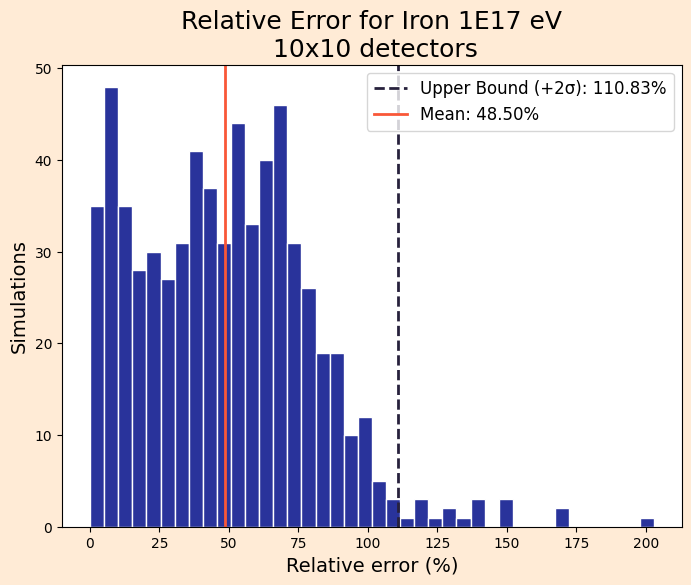

In [171]:
fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(erro_relativo, color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('Relative Error (%)')
plt.title('Relative Error for ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

# Calcula a média e o desvio padrão dos dados
mean = df3['Relative_error'].mean()
std = df3['Relative_error'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2f}%')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}%')

# Personaliza o eixo e a legenda
ax.set_xlabel('Relative error (%)', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() +'/energy_'+ caminho_arquivo.split('/')[-1] + '_array.pdf',bbox_inches = 'tight', dpi = 600)

In [172]:
from uncertainties import ufloat
import uncertainties.umath as umath

k_value = coefficients_iron[0]
k_error = inc[0]  
p_value = coefficients_iron[1]
p_error = inc[1]  

k_iron = ufloat(k_value, k_error)
p_iron = ufloat(p_value, p_error)

c_irons = [ufloat(c, c_err) for c, c_err in zip(parameters_df['C'], parameters_df['C_err'])]

E_iron_with_errors = []

E_real = float(name.split(' ')[1])

for c in c_irons:
    E = (c / k_iron) ** (1 / p_iron)
    E_iron_with_errors.append(E)


E_nominal = [e.nominal_value for e in E_iron_with_errors]
E_error = [e.std_dev for e in E_iron_with_errors]

erro_absoluto = [abs(e.nominal_value - E_real) for e in E_iron_with_errors]
erro_relativo = [(erro / E_real) * 100 for erro in erro_absoluto]


data = {
    'E': E_nominal,
    'Propagated_uncertainty': E_error,
    'Absolute_error': erro_absoluto,
    'Relative_error': erro_relativo    
}

df3 = pl.DataFrame(data)

df3

E,Propagated_uncertainty,Absolute_error,Relative_error
f64,f64,f64,f64
1.1229e17,1.3574e17,1.2291e16,12.290508
1.6783e17,2.0372e17,6.7827e16,67.827154
1.5846e17,1.9231e17,5.8465e16,58.464563
1.2290e17,1.4869e17,2.2903e16,22.90328
1.8669e17,2.2689e17,8.6688e16,86.687659
…,…,…,…
1.0959e17,1.3230e17,9.5860e15,9.58603
9.7419e16,1.1742e17,2.5808e15,2.580752
9.9272e16,1.1999e17,7.2804e14,0.728038


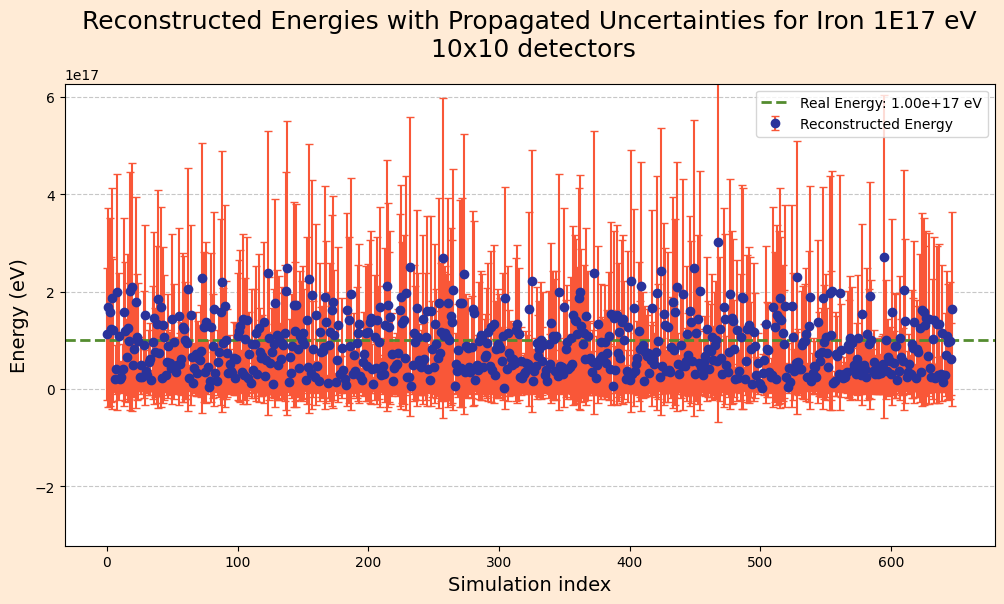

In [173]:
x = np.arange(len(E_nominal))  

plt.figure(figsize=(12, 6), facecolor='#FFEBD6')
ax = plt.gca()

plt.errorbar(
    x,
    E_nominal,
    yerr=E_error,
    fmt='o',           
    color='#29339B',    
    ecolor='#F95738',   
    elinewidth=1.5,    
    capsize=3,          
    #alpha=0.7,          
    label='Reconstructed Energy'
)

plt.axhline(
    E_real,
    color='#548C2F',
    linestyle='--',
    linewidth=2,
    label=f'Real Energy: {E_real:.2e} eV'
)

plt.xlabel('Simulation index', size=14)
plt.ylabel('Energy (eV)', size=14)
plt.title('Reconstructed Energies with Propagated Uncertainties for ' + str(name) + ' eV\n 10x10 detectors', size=18, pad=20)

# Adicionar legenda e grid
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(
    min(E_nominal) - 3 * np.mean(E_error),
    max(E_nominal) + 3 * np.mean(E_error)
)


plt.savefig('plots/' + name.split(' ')[0].lower() +'/energy_error_'+ caminho_arquivo.split('/')[-1] + '_array.pdf',bbox_inches = 'tight', dpi = 600)

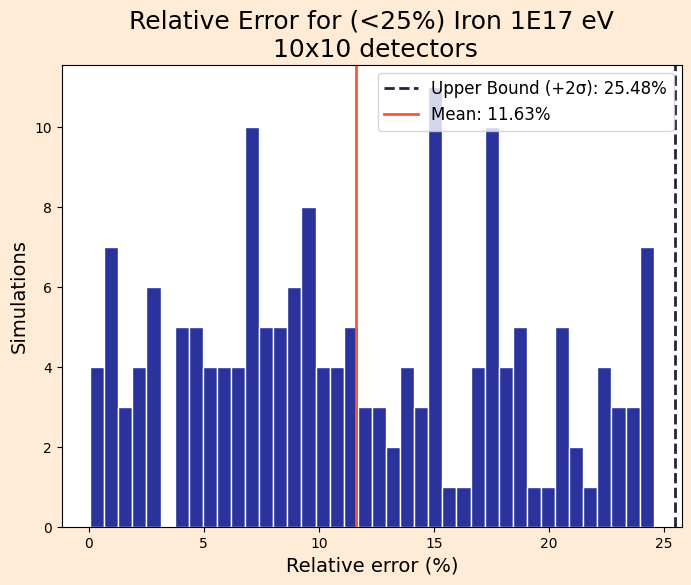

In [174]:
df3 = df3.filter(pl.col("Relative_error") < 25)

fig, ax = plt.subplots(figsize = (8, 6), facecolor = '#FFEBD6')
plt.hist(df3['Relative_error'], color='#29339B', bins= 40, edgecolor = 'white')
plt.ylabel('Simulations')
plt.xlabel('Relative Error (%)')
plt.title('Relative Error for (<25%) ' + str(name) + ' eV\n 10x10 detectors', size = 18)
#plt.grid(True)

# Calcula a média e o desvio padrão dos dados
mean = df3['Relative_error'].mean()
std = df3['Relative_error'].std()

# Determina os limites de 2 sigma
#lower_bound = mean - 2 * std
upper_bound = mean + 2 * std


# Adiciona linhas verticais para os limites de 2 sigma
#ax.axvline(lower_bound, color='#548C2F', linestyle='--', linewidth=2, label=f'Lower Bound (-2σ): {lower_bound:.2f}')
ax.axvline(upper_bound, color='#27213C', linestyle='--', linewidth=2, label=f'Upper Bound (+2σ): {upper_bound:.2f}%')
ax.axvline(mean, color='#F95738', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}%')

# Personaliza o eixo e a legenda
ax.set_xlabel('Relative error (%)', size=14)
ax.set_ylabel('Simulations', size=14)
ax.legend(loc='upper right', fontsize=12)

plt.savefig('plots/' + name.split(' ')[0].lower() +'/energy_25_'+ caminho_arquivo.split('/')[-1] + '_array.pdf',bbox_inches = 'tight', dpi = 600)

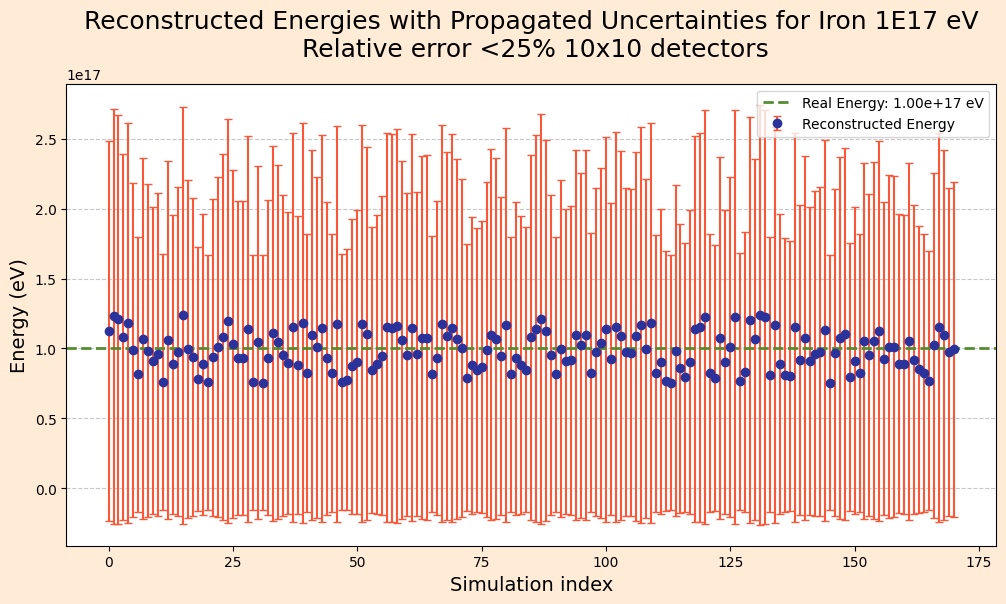

In [175]:
x = np.arange(len(df3))  

plt.figure(figsize=(12, 6), facecolor='#FFEBD6')
ax = plt.gca()

plt.errorbar(
    x,
    df3['E'],
    yerr=df3['Propagated_uncertainty'],
    fmt='o',           
    color='#29339B',    
    ecolor='#F95738',   
    elinewidth=1.5,    
    capsize=3,          
    #alpha=0.7,          
    label='Reconstructed Energy'
)

plt.axhline(
    E_real,
    color='#548C2F',
    linestyle='--',
    linewidth=2,
    label=f'Real Energy: {E_real:.2e} eV'
)

plt.xlabel('Simulation index', size=14)
plt.ylabel('Energy (eV)', size=14)
plt.title('Reconstructed Energies with Propagated Uncertainties for ' + str(name) + ' eV\n Relative error <25% 10x10 detectors', size=18, pad=20)

# Adicionar legenda e grid
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.ylim(
#    min(E_nominal) - 3 * np.mean(E_error),
#    max(E_nominal) + 3 * np.mean(E_error)
#)


plt.savefig('plots/' + name.split(' ')[0].lower() +'/energy_error_25_'+ caminho_arquivo.split('/')[-1] + '_array.pdf',bbox_inches = 'tight', dpi = 600)